In [4]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import dlib
import cv2
from PIL import Image

In [5]:
df = pd.read_csv('fairface.csv')

In [6]:
df.head()

,file,age,gender,race,phototype
0,1.jpg,50-59,Male,East Asian,III
1,10.jpg,30-39,Male,Middle Eastern,V
2,100.jpg,20-29,Female,East Asian,III
3,1000.jpg,30-39,Male,White,I & II
4,10004.jpg,40-49,Male,Indian,V


In [7]:
# Generate a statistical summary for any numerical columns (if any)
numerical_summary = df.describe()

# Check for missing values in the dataset
missing_values = df.isnull().sum()

numerical_summary, missing_values

(         file    age gender        race phototype
 count   35430  35430  35430       35430     35430
 unique  35430      5      2           7         5
 top     1.jpg  20-29   Male  East Asian       III
 freq        1  14337  17716        7086      7086,
 file         0
 age          0
 gender       0
 race         0
 phototype    0
 dtype: int64)

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35425    False
35426    False
35427    False
35428    False
35429    False
Length: 35430, dtype: bool

In [9]:
duplicates = df.duplicated()
# Visa antalet dubbletter
print("Antal dubbletter i datasetet:", duplicates.sum())

Antal dubbletter i datasetet: 0


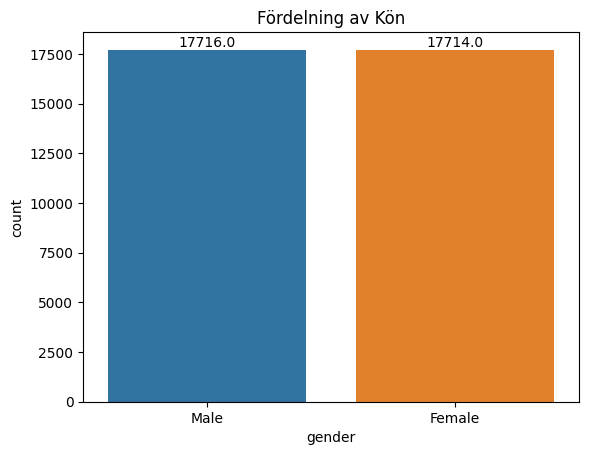

In [10]:
# Skapa en figur och en axel med matplotlib
fig, ax = plt.subplots()

# Skapa ett stapeldiagram för att visa fördelningen av fototyper
sns.countplot(x='gender', data=df, ax=ax)

# Beräkna antalet individer för varje fototyp och lägg till det ovanför staplarna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Sätt titel på grafen
ax.set_title('Fördelning av Kön')

# Visa grafen
plt.show()

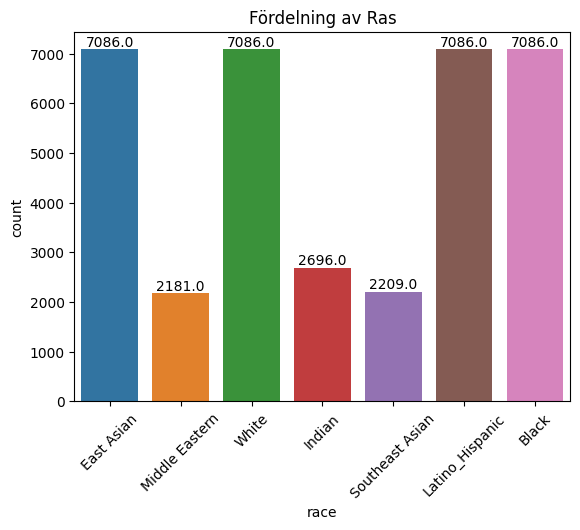

In [11]:
# Skapa en figur och en axel med matplotlib
fig, ax = plt.subplots()

# Skapa ett stapeldiagram för att visa fördelningen av fototyper
sns.countplot(x='race', data=df, ax=ax)

# Beräkna antalet individer för varje fototyp och lägg till det ovanför staplarna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Sätt titel på grafen
ax.set_title('Fördelning av Ras')
plt.xticks(rotation=45)

# Visa grafen
plt.show()

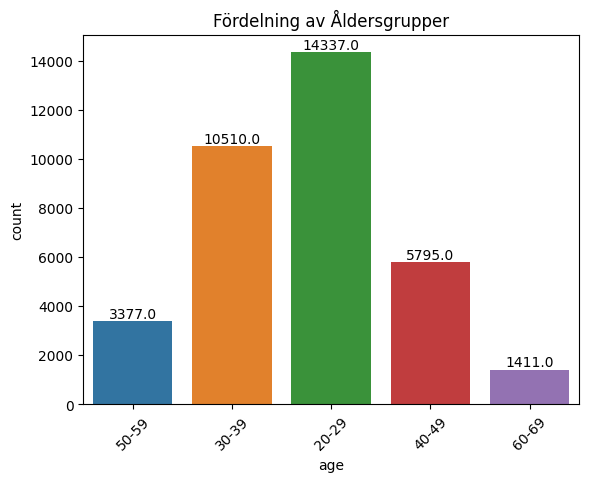

In [12]:
# Skapa en figur och en axel med matplotlib
fig, ax = plt.subplots()

# Skapa ett stapeldiagram för att visa fördelningen av fototyper
sns.countplot(x='age', data=df, ax=ax)

# Beräkna antalet individer för varje fototyp och lägg till det ovanför staplarna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Sätt titel på grafen
ax.set_title('Fördelning av Åldersgrupper')
plt.xticks(rotation=45)

# Visa grafen
plt.show()

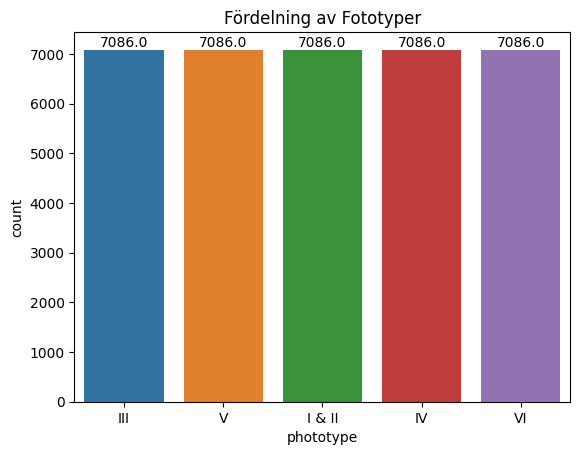

In [13]:
# Skapa en figur och en axel med matplotlib
fig, ax = plt.subplots()
# Skapa ett stapeldiagram för att visa fördelningen av fototyper
sns.countplot(x='phototype', data=df, ax=ax)
# Beräkna antalet individer för varje fototyp och lägg till det ovanför staplarna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
# Sätt titel på grafen
ax.set_title('Fördelning av Fototyper')
# Visa grafen
plt.show()

In [38]:

# import shutil

# # Assuming df is loaded from your dataset file
# # df = pd.read_csv('path_to_your_dataset.csv')

# main_directory = (r"C:\Users\46722\Desktop\fairfacedata\fairface_images")
# structured_directory = (r'C:\Users\46722\Desktop\OrganiseradeBilder')

# def organize_images(df, main_dir, structured_dir):
#     for index, row in df.iterrows():
#         source = os.path.join(main_dir, row['file'])
#         race_dir = os.path.join(structured_dir, row['race'])
        
#         if not os.path.exists(race_dir):
#             os.makedirs(race_dir)
#         destination = os.path.join(race_dir, row['file'])
#         if os.path.exists(source):
#             shutil.copy(source, destination)
#         else:
#             print(f'file could not be found and skipped: {source}')



In [39]:
organize_images(df, main_directory, structured_directory )

file could not be found and skipped: C:\Users\46722\Desktop\fairfacedata\fairface_images\28544.jpg
file could not be found and skipped: C:\Users\46722\Desktop\fairfacedata\fairface_images\31948.jpg
file could not be found and skipped: C:\Users\46722\Desktop\fairfacedata\fairface_images\3339.jpg
file could not be found and skipped: C:\Users\46722\Desktop\fairfacedata\fairface_images\34114.jpg
file could not be found and skipped: C:\Users\46722\Desktop\fairfacedata\fairface_images\47808.jpg
file could not be found and skipped: C:\Users\46722\Desktop\fairfacedata\fairface_images\56453.jpg


## Spliting images

In [43]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [53]:
import splitfolders

input_folder = r"C:\Users\46722\Desktop\OrganiseradeBilder"
output_folder = r"C:\Users\46722\Desktop\structured_dataset"

# Split with a ratio of 80% training, 20% validation
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2))

# Now you have a structured dataset with training and validation directories


Copying files: 35424 files [03:15, 180.79 files/s]


In [44]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [45]:
validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation data

In [55]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\46722\Desktop\structured_dataset\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 28337 images belonging to 7 classes.


In [56]:
validation_generator = validation_datagen.flow_from_directory(
    r"C:\Users\46722\Desktop\structured_dataset\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 7087 images belonging to 7 classes.


In [57]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [58]:
# Freeze the base model
base_model.trainable = False

In [59]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


In [60]:
# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [61]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
885/885 [==============================] - 650s 731ms/step - loss: 1.7359 - accuracy: 0.3317 - val_loss: 1.6593 - val_accuracy: 0.3529
Epoch 2/10
885/885 [==============================] - 531s 600ms/step - loss: 1.6522 - accuracy: 0.3626 - val_loss: 1.5742 - val_accuracy: 0.4014
Epoch 3/10
885/885 [==============================] - 534s 603ms/step - loss: 1.6239 - accuracy: 0.3754 - val_loss: 1.5776 - val_accuracy: 0.4005
Epoch 4/10
295/885 [=========>....................] - ETA: 4:59 - loss: 1.6144 - accuracy: 0.3893

In [41]:
# Ange sökvägen till din strukturerade bildmapp
image_directory = (r'C:\Users\46722\Desktop\OrganiseradeBilder')

# Skapa en bild-dataset
images = tf.keras.utils.image_dataset_from_directory(image_directory)

# Skala ner bilderna så att pixelvärdena ligger mellan 0 och 1
scaled_images = images.map(lambda x, y: (x / 255.0, y))

# Dela upp datasetet i tränings-, validerings- och testset
train_size = int(len(images) * 0.7)
validate_size = int(len(images) * 0.2)
test_size = len(images) - train_size - validate_size

train_dataset = scaled_images.take(train_size)
validate_dataset = scaled_images.skip(train_size).take(validate_size)
test_dataset = scaled_images.skip(train_size + validate_size)

print(f"Train size: {train_size}, Validation size: {validate_size}, Test size: {test_size}")

Found 35424 files belonging to 7 classes.
Train size: 774, Validation size: 221, Test size: 112


In [25]:
# Antal rasklasser
num_classes = 7

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Använd softmax för flerklassklassificering
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [27]:
model.fit(
            train_dataset,
    steps_per_epoch = 10,
    epochs = 5,
    validation_data = validate_dataset,
    validation_steps = 5
)

Epoch 1/5
10/10 [==============================] - 60s 6s/step - loss: 2.3662 - accuracy: 0.1562 - val_loss: 1.8565 - val_accuracy: 0.1500
Epoch 2/5
10/10 [==============================] - 19s 2s/step - loss: 1.8017 - accuracy: 0.2281 - val_loss: 1.8583 - val_accuracy: 0.2188
Epoch 3/5
10/10 [==============================] - 18s 2s/step - loss: 1.8002 - accuracy: 0.2406 - val_loss: 1.8827 - val_accuracy: 0.2313
Epoch 4/5
10/10 [==============================] - 18s 2s/step - loss: 1.8534 - accuracy: 0.1875 - val_loss: 1.8146 - val_accuracy: 0.2438
Epoch 5/5
10/10 [==============================] - 19s 2s/step - loss: 1.7687 - accuracy: 0.2688 - val_loss: 1.7776 - val_accuracy: 0.2500
